In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("Wholesale customers data.csv")
df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [2]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [3]:
df_clean = df.drop(['Channel', 'Region'], axis=1)

df_clean.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [4]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clean)

scaled_features[:5]

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       [ 0.10011141, -0.62401993, -0.3929769 ,  0.6871443 , -0.49858822,
         0.09341105],
       [ 0.84023948, -0.05239645, -0.07935618,  0.17385884, -0.23191782,
         1.29934689]])

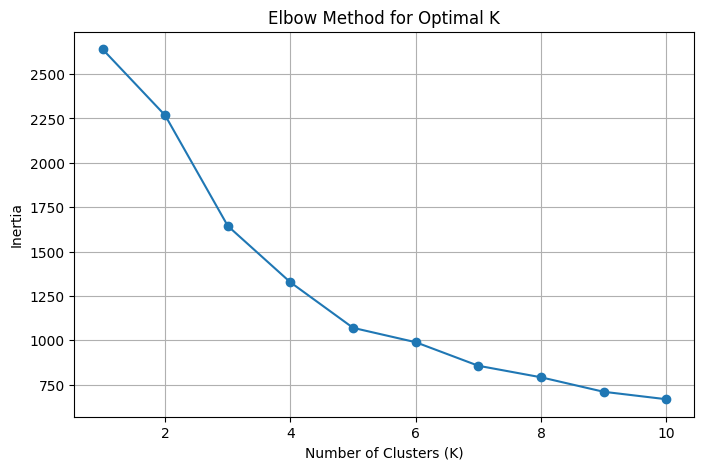

In [6]:
inertia = []

K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

In [8]:

k_optimal = 3

kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
df['Cluster'] = clusters

df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,1


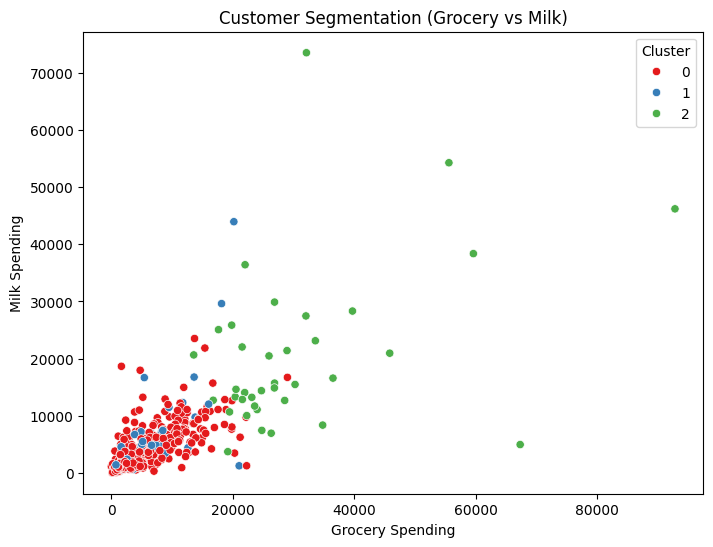

In [9]:

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df['Grocery'],
    y=df['Milk'],
    hue=df['Cluster'],
    palette='Set1'
)

plt.title('Customer Segmentation (Grocery vs Milk)')
plt.xlabel('Grocery Spending')
plt.ylabel('Milk Spending')
plt.legend(title='Cluster')
plt.show()


In [10]:

cluster_summary = df.groupby('Cluster').mean()
cluster_summary


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,,,
0,1.282857,2.534286,8935.500000,4228.528571,5848.034286,2167.231429,1913.605714,1102.120000
1,1.113208,2.698113,34540.113208,5860.358491,6122.622642,9841.735849,981.471698,3664.245283
2,2.000000,2.405405,8704.864865,20534.405405,30466.243243,1932.621622,14758.837838,2459.351351


In [12]:

output_path = "segmented_customers.csv"
df.to_csv(output_path, index=False)

output_path


'segmented_customers.csv'